In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np 
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("data/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df = df.drop(labels=['id', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'concave points_mean', 'concave points_worst', 'perimeter_se', 'area_se' ],axis = 1 )

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [6]:
cols = df.columns
cols

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
diagnosis = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].replace(diagnosis)

In [8]:
## Independent and dependent feature
X = df.drop(labels=['diagnosis'],axis=1)
Y = df[['diagnosis']]
#y = column_or_1d(y, warn=True)

In [9]:
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,cols)
])

In [126]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=40)
#X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
#X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
146,11.80,16.58,0.10910,0.17000,0.16590,0.2678,0.07371,0.3197,1.426,0.005427,0.03633,0.04649,0.018430,0.05628,0.004635,0.1385,0.4092,0.45040,0.5774,0.10300
345,10.26,14.71,0.09882,0.09159,0.03581,0.1633,0.07005,0.3380,2.509,0.017360,0.04671,0.02611,0.012960,0.03675,0.006758,0.1360,0.1636,0.07162,0.2434,0.08488
28,15.30,25.27,0.10820,0.16970,0.16830,0.1926,0.06540,0.4390,1.012,0.005233,0.03057,0.03576,0.010830,0.01768,0.002967,0.1641,0.6110,0.63350,0.4027,0.09876
497,12.47,17.31,0.08928,0.07630,0.03609,0.1526,0.06046,0.1532,0.781,0.003796,0.01371,0.01346,0.007096,0.01536,0.001541,0.1276,0.2506,0.20280,0.3035,0.07661
257,15.32,17.27,0.13350,0.22840,0.24480,0.2398,0.07596,0.6592,1.059,0.010150,0.04588,0.04983,0.021270,0.01884,0.008660,0.1765,0.4503,0.44290,0.3258,0.11910


In [127]:
X_train.shape

(398, 20)

In [128]:
## Model Training

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [129]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [138]:
## Train multiple models

models={
            "Random Forest":RandomForestClassifier(),
            "Decision Tree":DecisionTreeClassifier(),
            "Logistic":LogisticRegression(),
            'Random_forest_regressor':RandomForestRegressor(),
            'Decesion_tree_regressor':DecisionTreeRegressor(),
            'DecisionTreeClassifier':DecisionTreeClassifier()
            }
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

    # Finding precision and recall


print("Finding precision and recall")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

C:\Users\mohdalwaz\AppData\Local\Temp\ipykernel_31028\3568793423.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Random Forest
Model Training Performance
RMSE: 0.1529438225803745
MAE: 0.023391812865497075
R2 score 89.37888198757764


Decision Tree
Model Training Performance
RMSE: 0.22941573387056177
MAE: 0.05263157894736842
R2 score 76.1024844720497


Logistic
Model Training Performance
RMSE: 0.2757233972895037
MAE: 0.07602339181286549
R2 score 65.48136645962732




d:\projects\breast_cancer\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohdalwaz\AppData\Local\Temp\ipykernel_31028\3568793423.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Random_forest_regressor
Model Training Performance
RMSE: 0.1859258482638484
MAE: 0.09333333333333335
R2 score 84.30411180124224


Decesion_tree_regressor
Model Training Performance
RMSE: 0.22941573387056177
MAE: 0.05263157894736842
R2 score 76.1024844720497


DecisionTreeClassifier
Model Training Performance
RMSE: 0.25362863675089403
MAE: 0.06432748538011696
R2 score 70.7919254658385


Finding precision and recall
Accuracy   : 0.935672514619883
Precision : 0.9090909090909091
Recall    : 0.8928571428571429
F1-score  : 0.9009009009009009


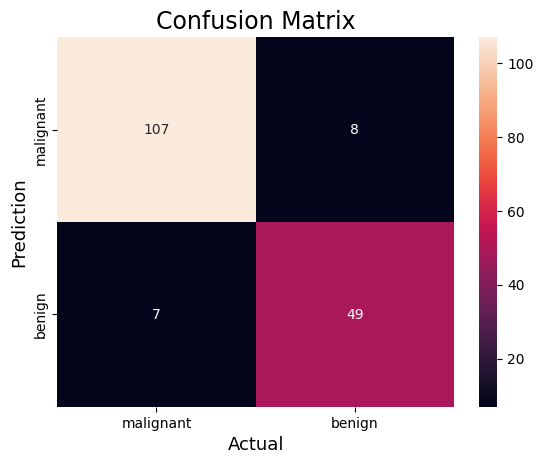

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       115
           1       0.86      0.88      0.87        56

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [131]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
#print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

In [132]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)